In [28]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
data = pd.read_csv('kanser.csv')

In [30]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [32]:
M = data[data.diagnosis == "M"] 
B = data[data.diagnosis == "B"]

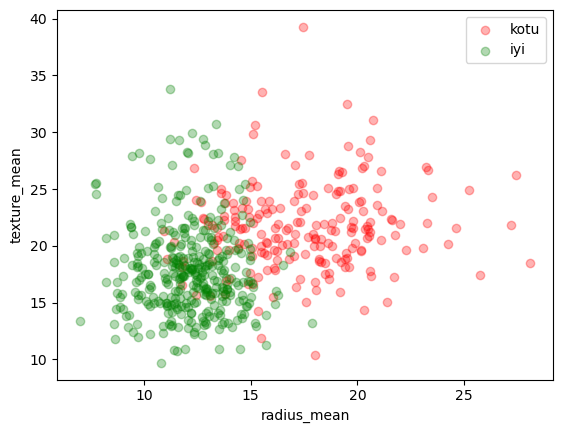

In [33]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha=0.3)   
plt.xlabel("radius_mean")   
plt.ylabel("texture_mean")  
plt.legend()    
plt.show()

In [34]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] # M=1, B=0
y = data.diagnosis.values
x = data.drop(["diagnosis"],axis=1) 
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)   

In [36]:
from sklearn.preprocessing import StandardScaler    
sc = StandardScaler()   

In [37]:
xtrain = sc.fit_transform(x_train) 
xtest = sc.transform(x_test)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,y_train)  

LogisticRegression()

In [39]:
yhead = lr.predict(xtest)   # predict

In [40]:
lr.score(xtest,y_test)  # score

0.9736842105263158

In [41]:
from sklearn.metrics import confusion_matrix    
cm = confusion_matrix(y_test,yhead) 
cm

array([[70,  1],
       [ 2, 41]], dtype=int64)

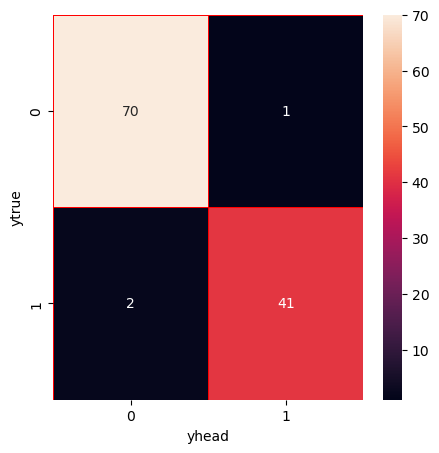

In [42]:
import seaborn as sns
f, ax = plt.subplots(figsize =(5,5))    
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)   
plt.xlabel("yhead") #predict values
plt.ylabel("ytrue") #true values
plt.show()

In [43]:
# Manuel olarak girilen özellik değerleri
manuel_ozellikler = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]

# Özellik isimlerini al
ozellik_isimleri = x.columns.tolist()

# Manuel özellikleri bir pandas DataFrame'ine dönüştür
manuel_df = pd.DataFrame([manuel_ozellikler], columns=ozellik_isimleri)

# Özellikleri ölçeklendir
manuel_ozellikler_olceklendirilmis = sc.transform(manuel_df)

# Tahmini yap
tahmin = lr.predict(manuel_ozellikler_olceklendirilmis)

# Tahmin edilen teşhis durumunu yazdır (0: İyi Huylu, 1: Kötü Huylu)
if tahmin == 0:
    print('İyi Huylu')
else:
    print('Kötü Huylu')

Kötü Huylu


In [44]:
pred = lr.predict_proba(manuel_ozellikler_olceklendirilmis) 
pred 

array([[6.10560891e-09, 9.99999994e-01]])

In [45]:
array = [[6.10560891e-09, 9.99999994e-01]]

formatted_array = [[format(num, '.8f') for num in row] for row in array]

print("Formatted Array:", formatted_array)

Formatted Array: [['0.00000001', '0.99999999']]
